In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)

In [6]:
df.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [7]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
df['cluster'] = yp
df.head(2)

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1


In [9]:
df.cluster.unique()

array([1, 2, 0])

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

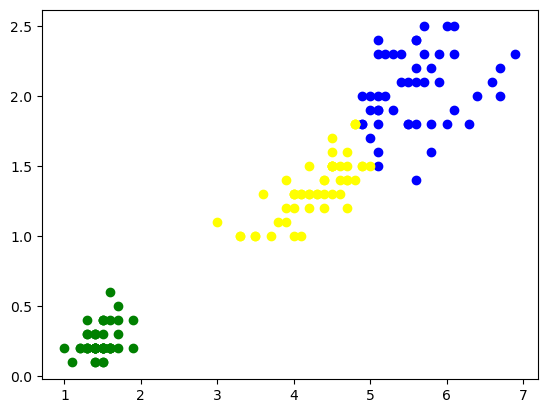

In [11]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

#  Elbow

In [12]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


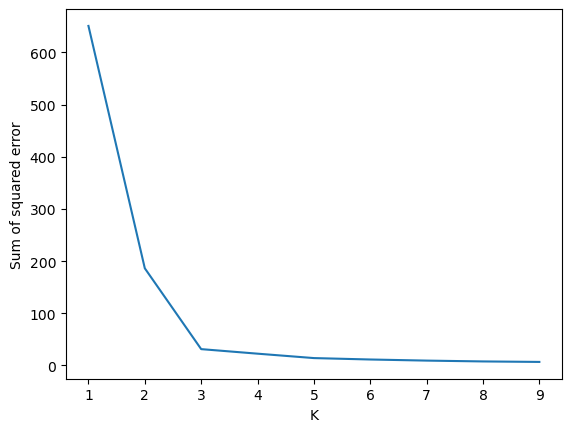

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [14]:
sse

[650.7886666666666,
 186.2797029114676,
 31.371358974358976,
 22.65903143812709,
 14.20679367588933,
 11.492874999999998,
 9.378284398779757,
 7.788416714864084,
 6.850950742240217]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_std=pd.DataFrame(min_max.fit_transform(data))
X_std.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [17]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(data)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [18]:
data['cluster'] = yp
data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


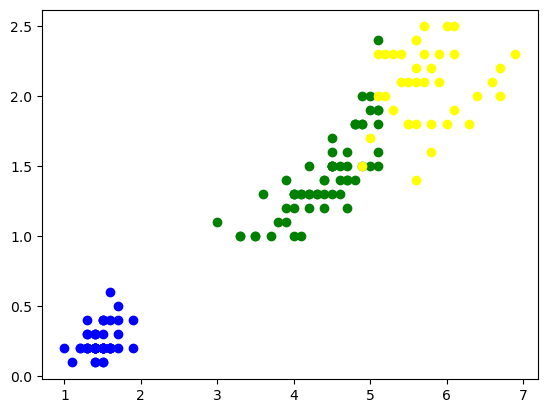

In [19]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]

plt.scatter(data1['petal length (cm)'],data1['petal width (cm)'],color='blue')
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'],color='green')
plt.scatter(data3['petal length (cm)'],data3['petal width (cm)'],color='yellow')

In [20]:
km.predict([[4.9,3.0,1.4,0.2]])

C:\Users\TEJKIRAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

In [21]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [23]:
# Calculate Silhoutte Score 
score = silhouette_score(data, km.labels_, metric='euclidean')

# Print the score 
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.613


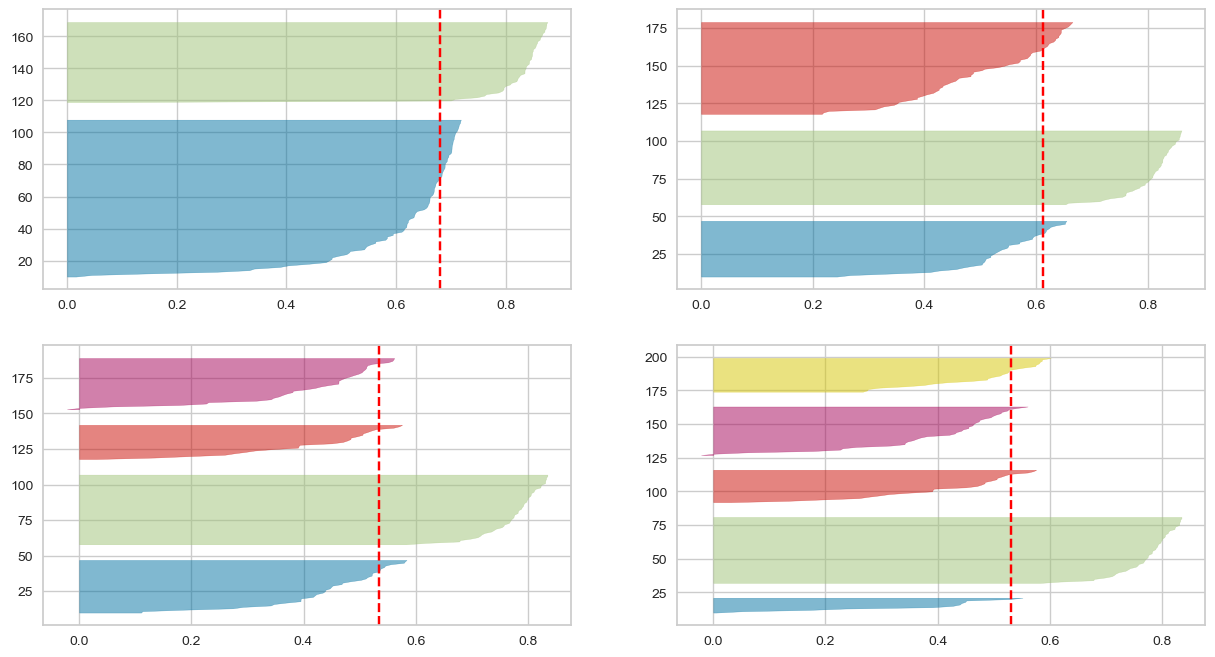

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)

<h2>Using Principal Component Analysis</h2>

Using PCA to reduce 4 features to 2 features and try to visualize

In [27]:
from sklearn.decomposition import PCA

In [26]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


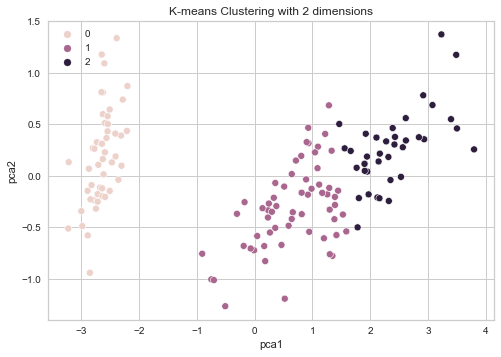

In [29]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=yp, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [30]:
results

,pca1,pca2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628
